In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

In [ ]:
!pip install fastbook

In [12]:
import fastbook
fastbook.setup_book() 

In [13]:
from fastbook import *
from fastai.vision.widgets import *

In [14]:
# run only in colab
# import os 
# os.chdir('/content/gdrive/MyDrive/SeeFood')

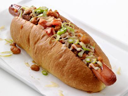

In [22]:
dest = 'testImage.jpg'
download_url('https://food.fnr.sndimg.com/content/dam/images/food/fullset/2010/4/26/0/FNM_050110-Weeknight-Dinners-009_s4x3.jpg.rend.hgtvcom.406.305.suffix/1371591134478.jpeg', dest)
im = Image.open(dest)
im.to_thumb(128,128)

In [23]:
learn_inf = load_learner('export.pkl') 

In [53]:
upload_btn = widgets.FileUpload()

In [56]:
pred_lbl = widgets.Label() 

In [57]:
predict_btn = widgets.Button(description = 'Predict')

In [58]:
def on_click(change): 
  img = PILImage.create(upload_btn.data[-1])
  output.clear_output() 
  with output:
    display(img.to_thumb(128,128))
  pred, pred_idx, probs = learn_inf.predict(img)
  pred_lbl.value = f'Prediction: {pred.title()}; Probability: {probs[pred_idx]:.2%}.'

predict_btn.on_click(on_click)

In [59]:
upload_btn = widgets.FileUpload()

In [61]:
VBox([widgets.Label('Upload your food!'), 
      upload_btn, predict_btn, output, pred_lbl])